In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Lasso Regression
class LassoRegression():
    
    def __init__(self, learning_rate, iterations, l1_penality):
        
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penality = l1_penality
        
    # Function For Model Training
    def fit(self, X, Y):
        
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        
        # slope initialization
        self.slope = np.zeros(self.n)
        
        self.intercept = 0
        self.X = X
        self.Y = Y
        
        # gradient descent learning
        for i in range(self.iterations):
            self.update_slope_intercept()
            
        return self
    
    
    # Helper function to update slope and intercept in gradient descent
    def update_slope_intercept(self):
        Y_pred = self.predict(self.X)
        
        # Calculate Gradients
        slope_derivative = np.zeros(self.n)
        
        for j in range(self.n):
            
            if self.slope[j] > 0:
                
                slope_derivative[j] = (- (2 * (self.X[:,j]).dot(self.Y - Y_pred) + self.l1_penality)) / self.m
                
            else:
                
                slope_derivative[j] = (- (2 * (self.X[:,j]).dot(self.Y - Y_pred) - self.l1_penality)) / self.m
                
                
        intercept_derivative = -2 * np.sum(self.Y - Y_pred) / self.m
        
        # Update slope and intercept
        self.slope = self.slope - self.learning_rate * slope_derivative
        self.intercept = self.intercept - self.learning_rate * intercept_derivative
        
        return self
    
    # Hypothetical Function
    def predict(self, X):
        return X.dot(self.slope) + self.intercept
    

In [4]:
# Cost Function
def mean_squared_error(y_true,y_predicted):
    # Calculating the loss or cost
    cost = np.sum((y_true - y_predicted)**2) / len(y_true)
    return cost

In [5]:
# Driver Code
def main():
    
    # Importing Dataset
    df = pd.read_csv("https://raw.githubusercontent.com/mohit-baliyan/references/master/salary_data.csv")
    X = df.iloc[:,:-1].values
    Y = df.iloc[:,1].values
    
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1/3,random_state=0)
    
    # Model Training
    model = LassoRegression(learning_rate=0.01, iterations=1000, l1_penality=500)
    model.fit(X_train,Y_train)
    
    # Prediction on test set
    Y_pred = model.predict(X_test)
    print("Predicted Values:",np.round( Y_pred[:3],2 ) )
    print("Real Values:",Y_test[:3])
    print("Trained Slope:",np.round(model.slope[0],2))
    print("Trained Intercept:",np.round(model.intercept,2))
    print("Mean Squared Error(MSE)",mean_squared_error(Y_test,Y_pred))
    
    # Visualization on Test Set
    plt.scatter(X_test, Y_test, color = 'blue')    
    plt.plot(X_test, Y_pred, color = 'orange')    
    plt.title('Salary vs Experience')    
    plt.xlabel('Years of Experience')    
    plt.ylabel('Salary')    
    plt.show()

Predicted Values: [ 40588.48 123315.96  65030.69]
Real Values: [ 37731 122391  57081]
Trained Slope: 9400.85
Trained Intercept: 26487.2
Mean Squared Error(MSE) 20680291.701482303


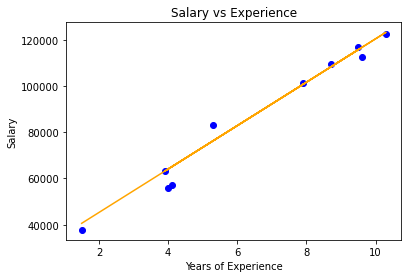

In [6]:
main()

### Lasso Regression Using Sklearn

In [9]:
# Importing Dataset
df = pd.read_csv("https://raw.githubusercontent.com/mohit-baliyan/references/master/salary_data.csv")
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [10]:
# Splitting dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1/3,random_state=0)

In [11]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()

In [12]:
lasso.fit(X_train,Y_train)

Lasso()

In [13]:
lasso_pred=lasso.predict(X_test)

In [14]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test,lasso_pred))

21026538.74622962
